In [1]:
Sys.setlocale("LC_ALL", 'Persian')

Warning message in Sys.setlocale("LC_ALL", "Persian"):
"using locale code page other than 65001 ("UTF-8") may cause problems"


[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [2]:
options(scipen=999)

In [3]:
install.packages("psych")

Installing package into 'C:/Users/ali/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ali\AppData\Local\Temp\Rtmp0Ov24H\downloaded_packages


In [4]:
install.packages("jtools")

Installing package into 'C:/Users/ali/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'jtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ali\AppData\Local\Temp\Rtmp0Ov24H\downloaded_packages


In [5]:
library(ggplot2)
library(glue)
library(psych)
library(jtools)
library(plyr)
library(dplyr)
library(usdm)
library(STAT)
# library(GGally)
library(car)
library(caret)
library(leaps)
library(forecast)

Warning message:
"package 'psych' was built under R version 4.3.2"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message:
"package 'jtools' was built under R version 4.3.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'usdm' was built under R version 4.3.2"


ERROR: Error: package 'terra' required by 'usdm' could not be found


In [30]:
data = readxl::read_excel("D:\\Visualization-and-Data-Analyzing-2-master\\Iran_Maskan_koll9904.xlsx")

In [31]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'

data = data[!is.na(data$contrat_number), ]
data$percentage = as.numeric(data$percentage)
data$price = as.numeric(data$price)/ 1000
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [32]:
koozestan = data[data$state == 'خوزستان', ]

In [33]:
summary(koozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

In [34]:
head(koozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,1950,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,7350,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,5850,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,4000,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,2850,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,5000,6.923290,9,بتوني و فلزي,1399/04/02,617763


In [37]:
column_names <- c('contrat_number','contract_type', 'state', 'city',
 'property_type', 'district_number', 'usage_type', 'area', 'percentage',
 'price','price_per_square', 'building_age', 'skeleton_type', 'contract_date', 'postal_code')

names(data) <- column_names

In [38]:
head(koozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,1950,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,7350,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,5850,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,4000,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,2850,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,5000,6.923290,9,بتوني و فلزي,1399/04/02,617763


In [39]:
koozestan = koozestan[-c(1,2,3,5,7,9,11,14)]

In [40]:
head(koozestan)

city,district_number,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
اهواز,NA,75.00,1950,2,بدون اسکلت,617563
اهواز,2,96.30,7350,13,فلزي,191181
اهواز,8,111.60,5850,8,بتوني,618493
اهواز,4,13313.00,4000,11,فلزي,613668
اهواز,5,80.48,2850,11,بتوني و فلزي,613495
اهواز,3,72.22,5000,9,بتوني و فلزي,617763


In [41]:
unique(koozestan$city)

[1] "اهواز"           "ايذه"            "آبادان"          "بندر امام خميني"
 [5] "بندر ماهشهر"     "بهبهان"          "چمران"           "خرمشهر"         
 [9] "دزفول"           "رامشير"          "شوش"             "شوشتر"          
[13] "شيبان"           "مسجد سليمان"     "هنديجان"

In [42]:
unique(koozestan$city)

[1] "اهواز"           "ايذه"            "آبادان"          "بندر امام خميني"
 [5] "بندر ماهشهر"     "بهبهان"          "چمران"           "خرمشهر"         
 [9] "دزفول"           "رامشير"          "شوش"             "شوشتر"          
[13] "شيبان"           "مسجد سليمان"     "هنديجان"

In [43]:
koozestan$city = mapvalues(koozestan$city, 
                              from= c(unique(koozestan$city)),
                              to= c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

In [44]:
unique(koozestan$city)

[1] "ahvaz"                 "izeh"                  "abadan"               
 [4] "bandare_emam_khomeini" "bandare_mahshahr"      "behbahan"             
 [7] "chamran"               "khorramshahr"          "dezfool"              
[10] "raamshir"              "shoosh"                "shooshtar"            
[13] "shiban"                "masjed_soleiman"       "handijan"

In [45]:
koozestan = koozestan[-c(2)]

In [46]:
head(koozestan)

city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ahvaz,75.00,1950,2,بدون اسکلت,617563
ahvaz,96.30,7350,13,فلزي,191181
ahvaz,111.60,5850,8,بتوني,618493
ahvaz,13313.00,4000,11,فلزي,613668
ahvaz,80.48,2850,11,بتوني و فلزي,613495
ahvaz,72.22,5000,9,بتوني و فلزي,617763


In [47]:
koozestan$skeleton_type = mapvalues(koozestan$skeleton_type,
                                   from=c(unique(koozestan$skeleton_type)[1],unique(koozestan$skeleton_type)[2],unique(koozestan$skeleton_type)[3],unique(koozestan$skeleton_type)[4],unique(koozestan$skeleton_type)[5],unique(koozestan$skeleton_type)[6]), 
                                   to=c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay'))
     

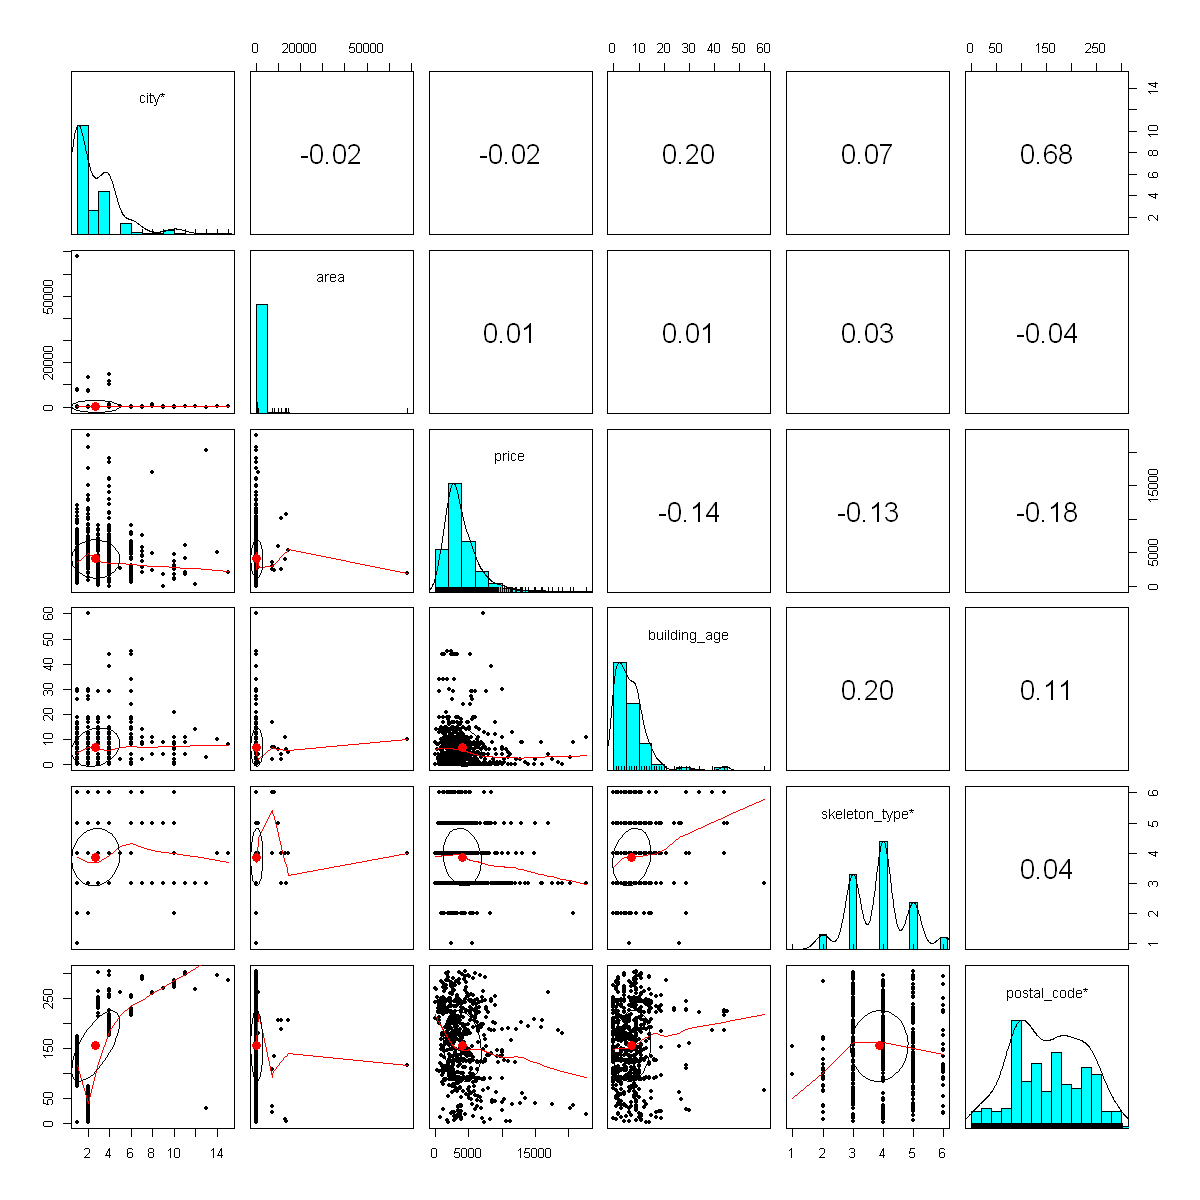

In [48]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(koozestan, col="red")

In [49]:
sample.int(4,10,4)

[1] 3 2 1 3 1 1 3 3 2 1

In [50]:
str(koozestan)

tibble [768 x 6] (S3: tbl_df/tbl/data.frame)
 $ city         : chr [1:768] "ahvaz" "ahvaz" "ahvaz" "ahvaz" ...
 $ area         : num [1:768] 75 96.3 111.6 13313 80.5 ...
 $ price        : num [1:768] 1950 7350 5850 4000 2850 ...
 $ building_age : num [1:768] 2 13 8 11 11 9 3 1 2 2 ...
 $ skeleton_type: chr [1:768] "none" "metal" "concrete" "metal" ...
 $ postal_code  : chr [1:768] "617563" "191181" "618493" "613668" ...


In [51]:
install.packages('caret')

Warning message:
"package 'caret' is in use and will not be installed"


In [52]:
library(caret)

In [53]:
dummy_koozestan <- data.frame(predict(dummyVars(~., koozestan), koozestan))

In [54]:
dummy_koozestan

,cityabadan,cityahvaz,citybandare_emam_khomeini,citybandare_mahshahr,citybehbahan,citychamran,citydezfool,cityhandijan,cityizeh,citykhorramshahr,⋯,postal_code646193,postal_code646542,postal_code647714,postal_code649161,postal_code649165,postal_code649172,postal_code649176,postal_code649178,postal_code656464,postal_code678945
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [55]:
set.seed(831)

train_index <- sample.int(nrow(koozestan), 0.8*nrow(koozestan), replace = F)

train <- dummy_koozestan[train_index, ]

validation = dummy_koozestan[-train_index,-c(17)]
y_validation = dummy_koozestan[-train_index,c(17)]

In [56]:
all.reg <- lm(price ~. , data = train)
summary(all.reg)


Call:
lm(formula = price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5857.6  -553.4     0.0   392.6  6778.4 

Coefficients: (52 not defined because of singularities)
                                       Estimate   Std. Error t value
(Intercept)                          5856.59156   1920.98200   3.049
cityabadan                          -3164.73570   2283.95362  -1.386
cityahvaz                           -3591.37786   2624.00364  -1.369
citybandare_emam_khomeini           -2803.52877   3050.88235  -0.919
citybandare_mahshahr                 -969.13128   2628.61644  -0.369
citybehbahan                        -3096.18771   2613.72223  -1.185
citychamran                          1494.22046   3475.67133   0.430
citydezfool                         -1813.46265   2624.46439  -0.691
cityhandijan                        10936.46074   2632.24191   4.155
cityizeh                            -3757.85733   2628.62135  -1.430
citykhorramshahr                    -2337.411

Warning message:
"not plotting observations with leverage one:
  7, 9, 10, 11, 13, 14, 19, 20, 21, 22, 32, 33, 42, 43, 57, 58, 61, 62, 65, 67, 70, 72, 74, 77, 78, 81, 82, 83, 84, 86, 87, 89, 92, 93, 108, 109, 113, 116, 122, 124, 128, 130, 132, 134, 135, 139, 145, 149, 150, 159, 160, 163, 167, 182, 185, 188, 190, 192, 193, 197, 198, 206, 207, 211, 213, 214, 217, 232, 238, 245, 246, 247, 253, 255, 258, 261, 267, 278, 284, 286, 290, 293, 298, 301, 315, 325, 327, 331, 336, 339, 347, 348, 349, 351, 355, 356, 357, 360, 364, 369, 370, 374, 375, 378, 382, 384, 385, 386, 387, 390, 396, 397, 400, 406, 407, 416, 427, 430, 436, 440, 445, 448, 450, 451, 452, 453, 456, 458, 465, 474, 475, 477, 478, 486, 487, 488, 489, 490, 491, 495, 496, 497, 502, 504, 505, 510, 512, 516, 526, 527, 530, 531, 535, 537, 538, 544, 546, 547, 552, 553, 561, 563, 568, 575, 576, 580, 581, 586, 587, 589, 597, 608, 610, 611"


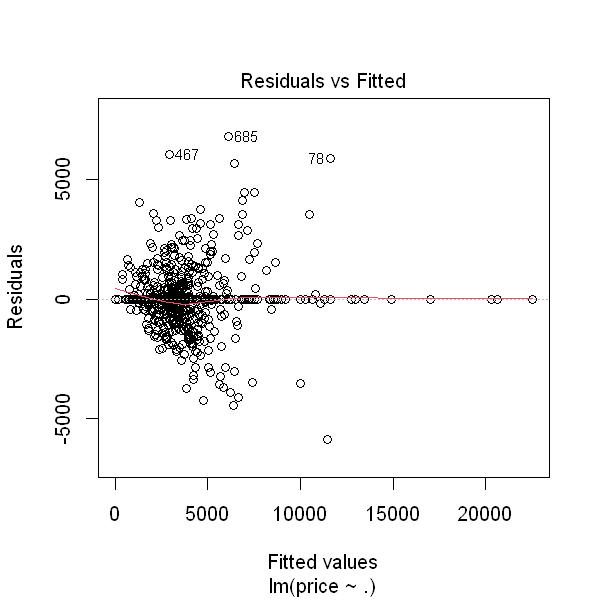

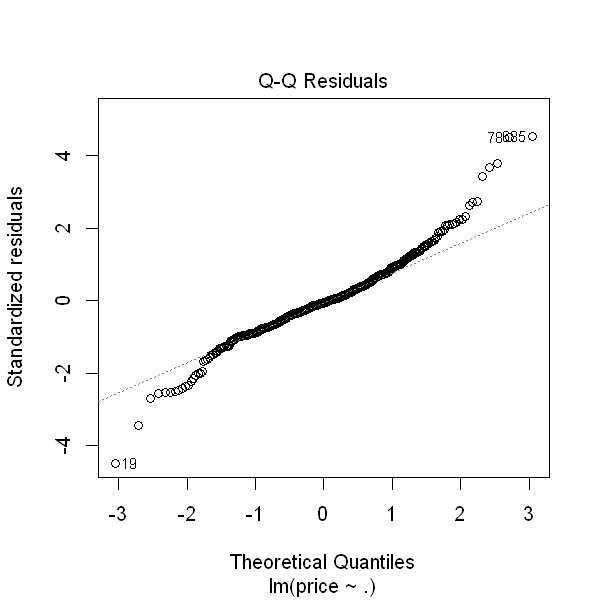

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


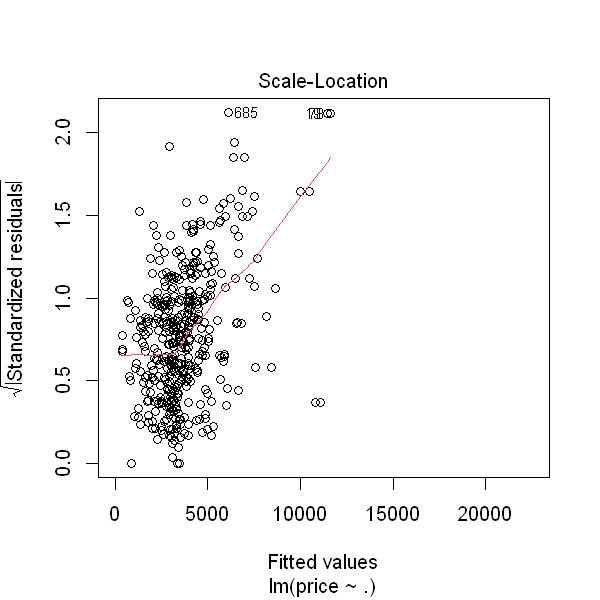

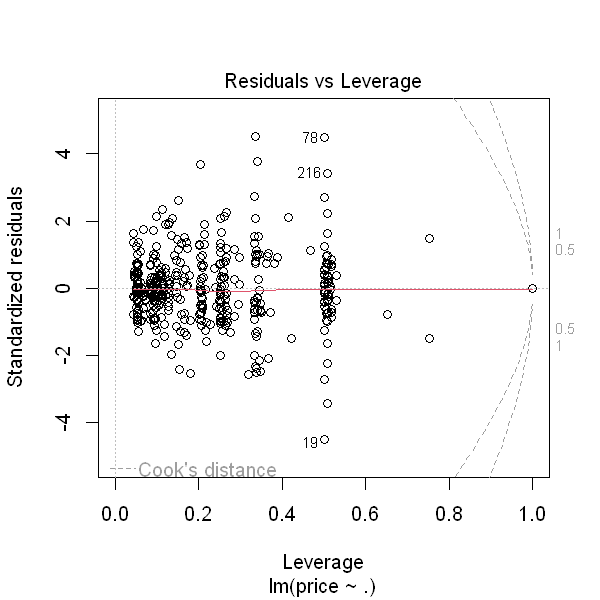

In [57]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg)

In [58]:
install.packages('forecast')

Installing package into 'C:/Users/ali/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ali\AppData\Local\Temp\Rtmp0Ov24H\downloaded_packages


In [59]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 4.3.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [60]:
accuracy(all.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,-0.0000000000000432336,1371.101,849.1999,-23.56963,39.86008,0.4395899


In [61]:
y_train_hat = predict(all.reg,train[-17])

Warning message in predict.lm(all.reg, train[-17]):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


In [62]:
train_residuals = train[,17] - y_train_hat

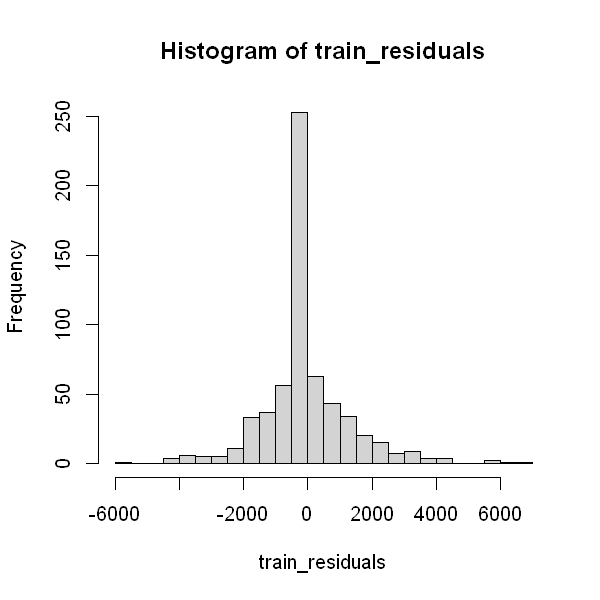

In [63]:
hist(train_residuals,breaks=40)

In [64]:
y_validation_hat = predict(all.reg,validation)

Warning message in predict.lm(all.reg, validation):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


In [65]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,709.5021,3528.682,2246.606,-1787.663,1835.159


In [66]:
validation_residuals = y_validation - y_validation_hat

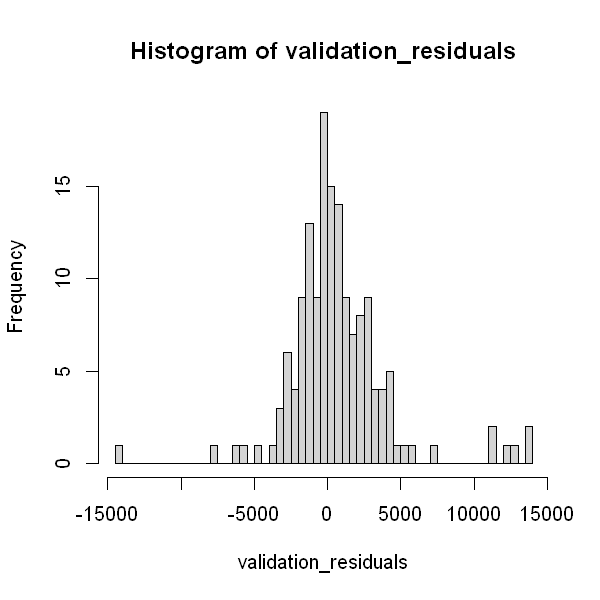

In [67]:
hist(validation_residuals,breaks=40)

In [68]:
formula.all.variables <- formula(lm(price~.,train))
forward.reg = step(lm(price ~ 1 ,data = train),direction='forward',scope=formula.all.variables) 

Start:  AIC=9746.65
price ~ 1

                                     Df Sum of Sq        RSS    AIC
+ cityahvaz                           1 487763442 4306865603 9682.8
+ postal_code613865                   1 347190719 4447438326 9702.5
+ postal_code615568                   1 278939464 4515689581 9711.8
+ cityshiban                          1 268344368 4526284677 9713.3
+ postal_code614818                   1 268344368 4526284677 9713.3
+ skeleton_typeconcrete               1 228702967 4565926079 9718.6
+ postal_code635917                   1 171047931 4623581114 9726.3
+ postal_code635190                   1 120490516 4674138529 9733.0
+ postal_code615573                   1 116443327 4678185718 9733.6
+ citybandare_emam_khomeini           1 108607063 4686021982 9734.6
+ postal_code635165                   1  98823032 4695806013 9735.9
+ cityhandijan                        1  97419887 4697209158 9736.0
+ postal_code616464                   1  91310627 4703318418 9736.8
+ postal_code6183

Warning message:
"not plotting observations with leverage one:
  11, 13, 21, 58, 62, 65, 67, 72, 76, 78, 81, 92, 113, 124, 130, 135, 139, 149, 150, 185, 192, 206, 253, 258, 261, 267, 286, 315, 327, 347, 364, 369, 378, 385, 386, 397, 406, 416, 427, 430, 436, 448, 450, 451, 456, 468, 474, 475, 488, 504, 512, 516, 527, 535, 537, 546, 552, 581, 608, 610"


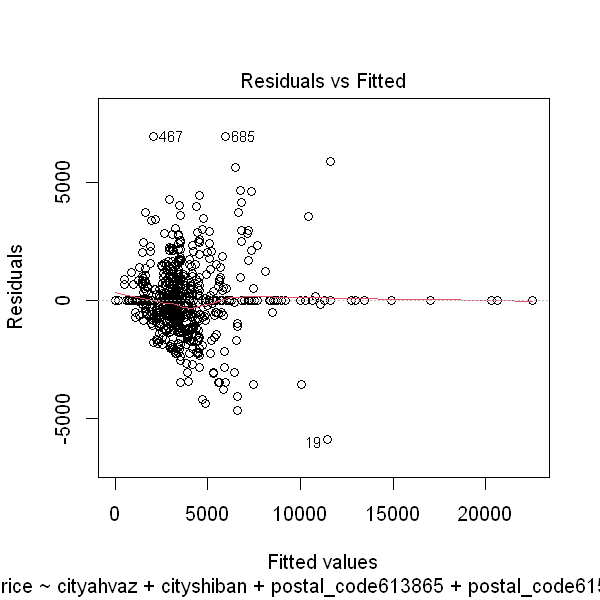

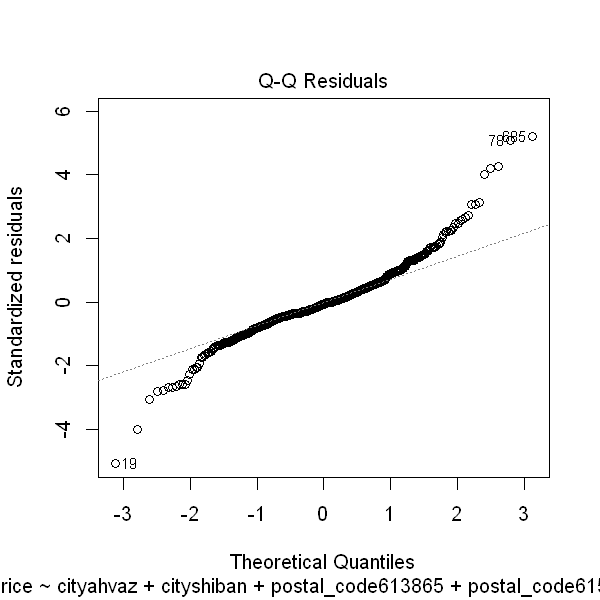

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


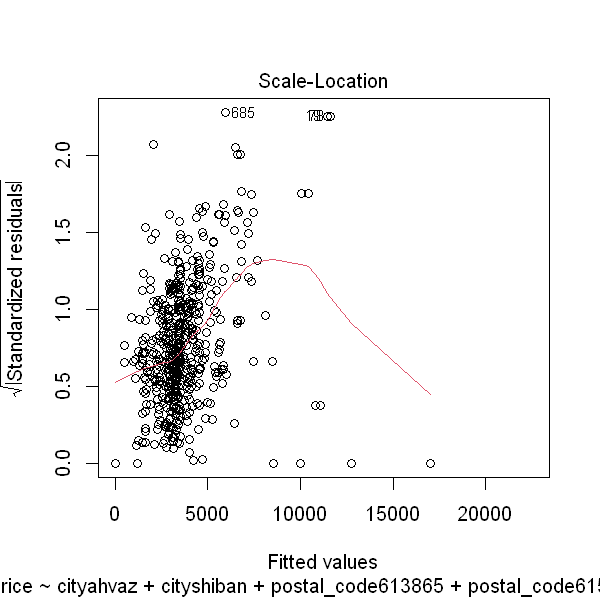

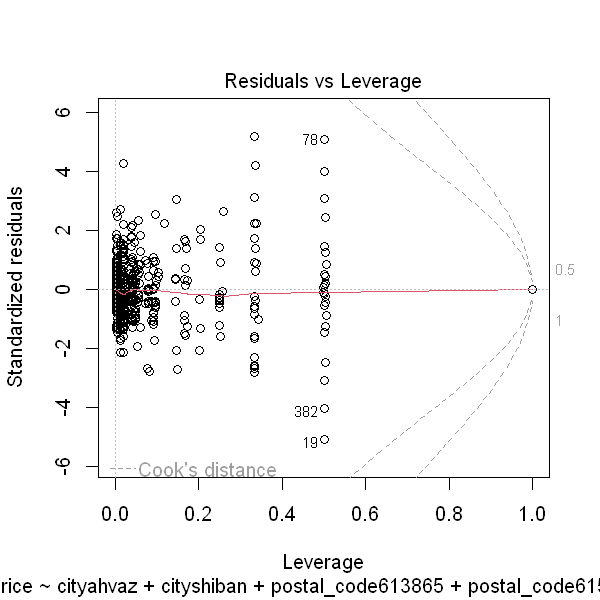

In [69]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(forward.reg)

In [96]:
accuracy(forward.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,0.000000000000008590305,1489.563,1027.261,-27.22847,46.33851,0.5317634


,ME,RMSE,MAE,MPE,MAPE
Test set,639.2789,2944.43,1868.397,-1867.821,1902.096


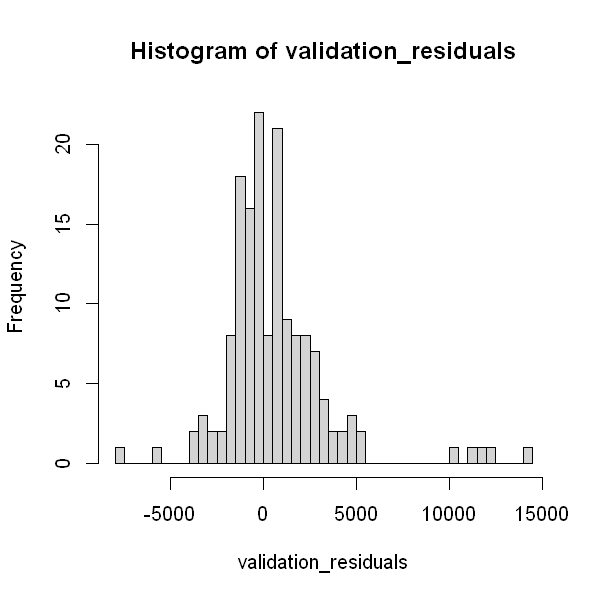

In [70]:
y_validation_hat = predict(forward.reg,validation)
accuracy(y_validation_hat , y_validation)
validation_residuals = y_validation - y_validation_hat
hist(validation_residuals,breaks=40)

In [71]:
backward.reg = step(lm(price ~ . ,data = train),direction='backward')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
summary(backward.reg)


Call:
lm(formula = price ~ cityabadan + citybandare_emam_khomeini + 
    citychamran + cityhandijan + citykhorramshahr + citymasjed_soleiman + 
    cityraamshir + cityshiban + area + building_age + skeleton_typebrick_or_cement_block + 
    skeleton_typeconcrete + postal_code191181 + postal_code613373 + 
    postal_code613388 + postal_code613664 + postal_code613682 + 
    postal_code613865 + postal_code614398 + postal_code614498 + 
    postal_code615167 + postal_code615468 + postal_code615568 + 
    postal_code615569 + postal_code615573 + postal_code615574 + 
    postal_code615896 + postal_code616388 + postal_code616395 + 
    postal_code616396 + postal_code616397 + postal_code616463 + 
    postal_code616464 + postal_code616478 + postal_code616571 + 
    postal_code618397 + postal_code618398 + postal_code618493 + 
    postal_code618761 + postal_code619587 + postal_code631454 + 
    postal_code631471 + postal_code631473 + postal_code631481 + 
    postal_code631483 + postal_code631494 + 

Warning message:
"not plotting observations with leverage one:
  7, 11, 13, 14, 21, 58, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 364, 369, 378, 385, 397, 400, 406, 416, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 527, 535, 537, 546, 552, 575, 581"


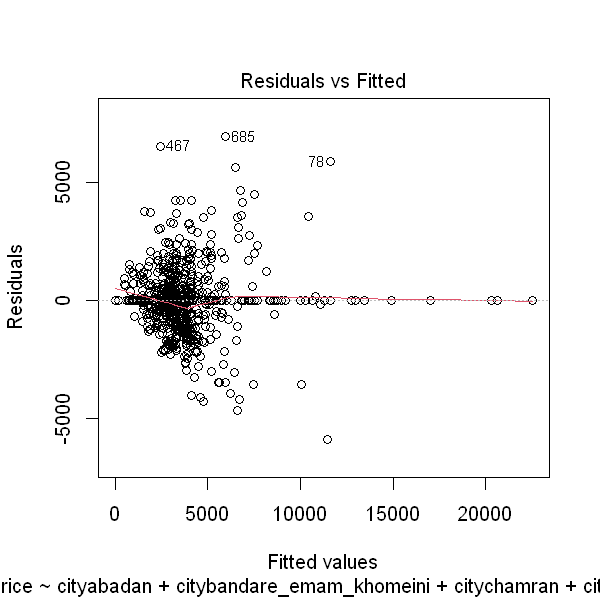

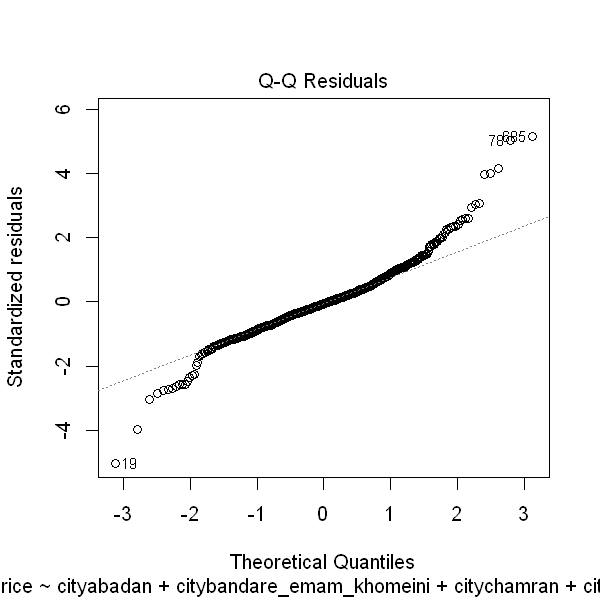

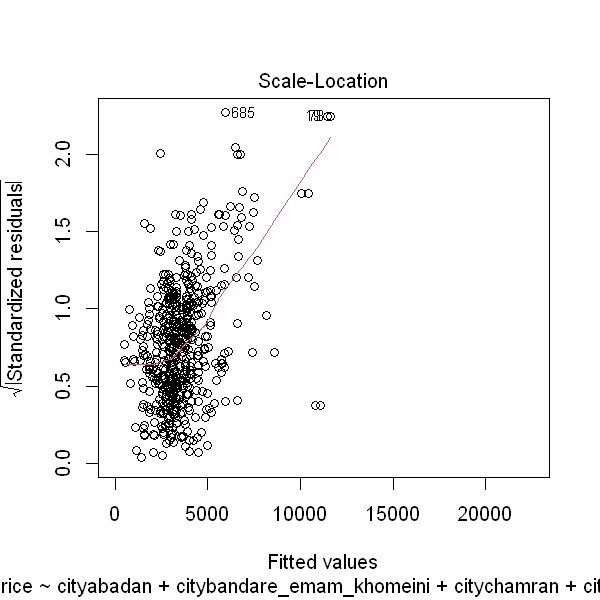

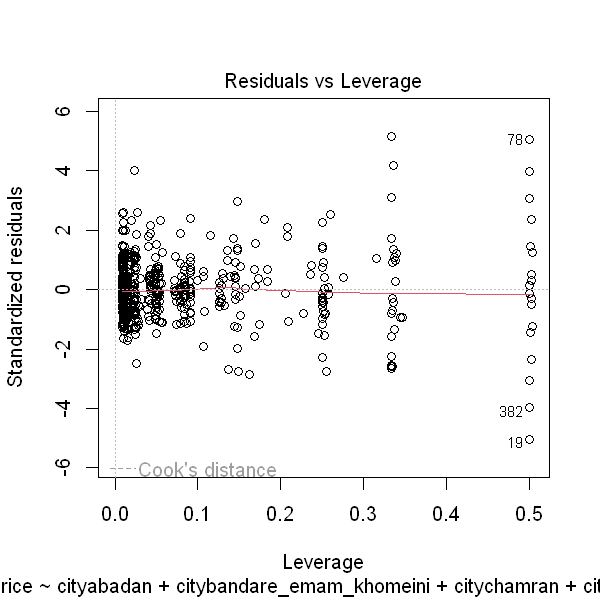

In [73]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(backward.reg)

In [74]:
y_validation_hat = predict(backward.reg,validation)

In [75]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,610.442,3347.459,2077.136,-2163.079,2203.544


In [76]:
validation_residuals = y_validation - y_validation_hat

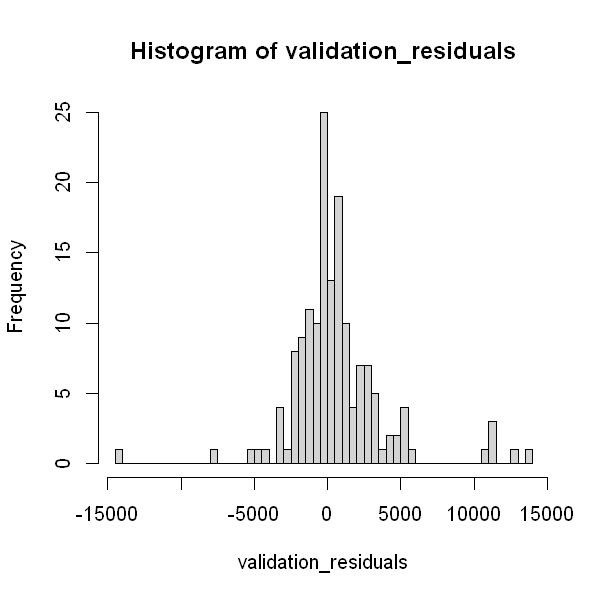

In [77]:
hist(validation_residuals,breaks=40)

In [78]:
stepwise.reg = step(lm(price ~ . ,data = train),direction='both')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [79]:
summary(stepwise.reg)


Call:
lm(formula = price ~ cityabadan + citybandare_emam_khomeini + 
    citychamran + cityhandijan + citymasjed_soleiman + cityraamshir + 
    cityshiban + area + building_age + skeleton_typebrick_or_cement_block + 
    skeleton_typeconcrete + postal_code191181 + postal_code613373 + 
    postal_code613388 + postal_code613664 + postal_code613674 + 
    postal_code613682 + postal_code613865 + postal_code614398 + 
    postal_code614498 + postal_code615167 + postal_code615468 + 
    postal_code615568 + postal_code615569 + postal_code615573 + 
    postal_code615574 + postal_code615896 + postal_code616388 + 
    postal_code616394 + postal_code616395 + postal_code616396 + 
    postal_code616397 + postal_code616463 + postal_code616464 + 
    postal_code616478 + postal_code616571 + postal_code618397 + 
    postal_code618398 + postal_code618493 + postal_code618761 + 
    postal_code619587 + postal_code631454 + postal_code631471 + 
    postal_code631473 + postal_code631481 + postal_code631483 +

Warning message:
"not plotting observations with leverage one:
  11, 13, 21, 22, 58, 61, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 185, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 351, 364, 378, 385, 397, 400, 406, 416, 427, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 527, 535, 537, 546, 552, 575, 581"


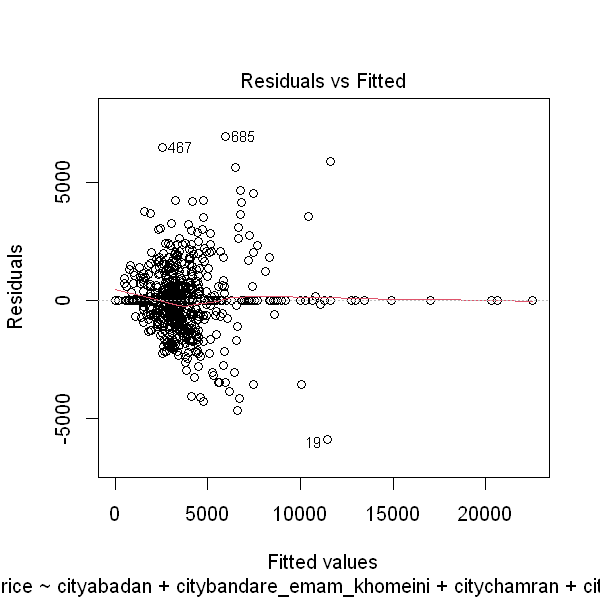

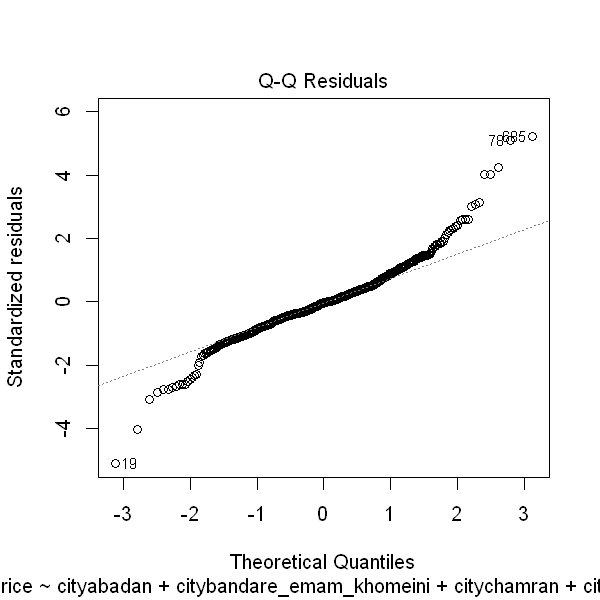

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


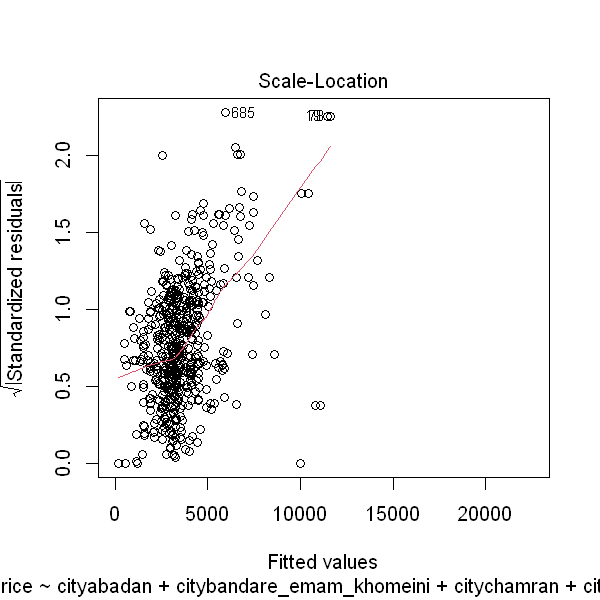

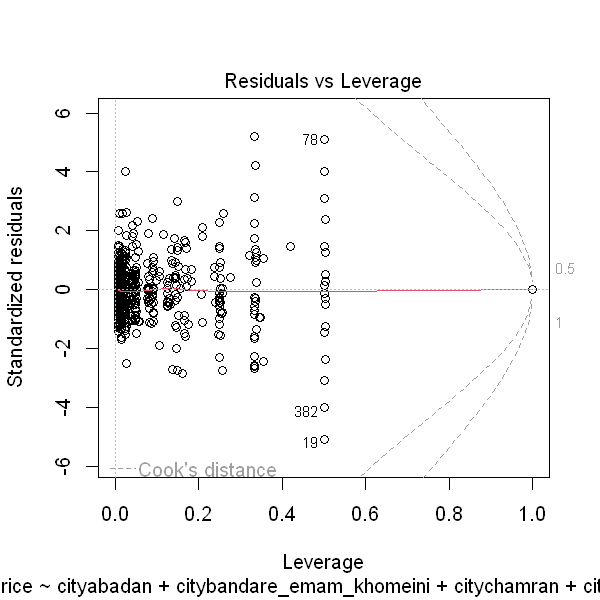

In [80]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(stepwise.reg)

In [81]:
accuracy(stepwise.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,-0.00000000000005794569,1469.882,1021.457,-27.56854,47.29889,0.528759


In [82]:
y_train_hat = predict(stepwise.reg,train[-17])

In [83]:
train_residuals = train[,17] - y_train_hat

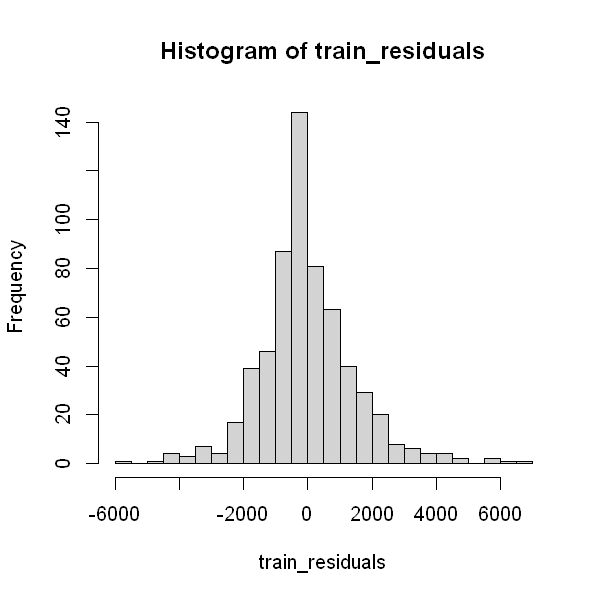

In [84]:
hist(train_residuals,breaks=40)

In [85]:
y_validation_hat = predict(stepwise.reg,validation)

In [86]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,668.3853,3347.537,2067.12,-1921.262,1962.594


In [87]:
validation_residuals = y_validation - y_validation_hat

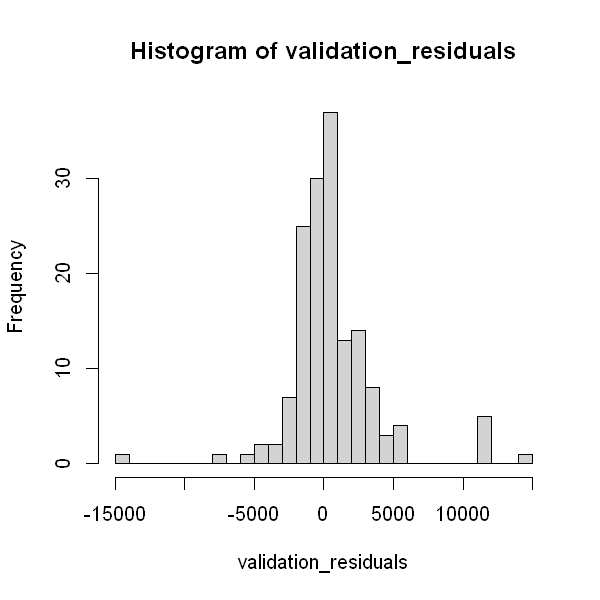

In [88]:
hist(validation_residuals,breaks=40)

In [89]:
exhaustive.reg = regsubsets(price ~ . ,data = train, nbest=1, nvmax = dim(train)[2], method = 'exhaustive',really.big=T)

ERROR: Error in regsubsets(price ~ ., data = train, nbest = 1, nvmax = dim(train)[2], : could not find function "regsubsets"


In [90]:
summary = summary(exhaustive.reg)

ERROR: Error in eval(expr, envir, enclos): object 'exhaustive.reg' not found


In [ ]:
summary$which

In [ ]:
summary$rsq

In [ ]:
summary$adjr2

In [ ]:
summary$Cp

In [99]:
all.reg <- lm(price ~ city + area + building_age + skeleton_type + postal_code ,data = train)
summary(all.reg)

ERROR: Error in eval(predvars, data, env): object 'city' not found


In [98]:
options(repr.plot.width = 10, repr.plot.height = 10)
train$building_age = sqrt(train$building_age)
train$price = sqrt(train$price)
train$area = log10(train$area)
pairs.panels(train, col="red")

ERROR: Error in plot.new(): figure margins too large


In [ ]:
all.reg.2 <- lm(price ~. ,data = train)
summary(all.reg.2)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(khoozestan, col="red")

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
khoozestan$area = log10(khoozestan$area)
pairs.panels(khoozestan, col="red")

In [ ]:
all.reg.2 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.2)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
khoozestan$building_age = sqrt(khoozestan$building_age)
pairs.panels(khoozestan, col="red")

In [ ]:
all.reg.3 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.3)

In [ ]:
# Eliminate extreme values
cutoff <- 4/((nrow(khoozestan)-length(all.reg.3$coefficients)-2)) # Cook's D plot, cutoff as 4/(n-k-1)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.3, which=4, cook.levels=cutoff) 

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.3, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("766", "767", "768")),] 

In [ ]:
all.reg.4 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.4)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.4$coefficients)-2))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.4, which=4, cook.levels=cutoff)  

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.4, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("43", "169", "171")),] 

In [ ]:
all.reg.5 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.5)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.5$coefficients)-2))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.5, which=4, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.5, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("80", "81", "401")),]

In [ ]:
all.reg.6 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.6)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.6$coefficients)-2))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.6, which=4, cook.levels=cutoff) 

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.6, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("2", "11", "127")),] 

In [ ]:
all.reg.7 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.7)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.7$coefficients)-2))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.7, which=4, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.7, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("3", "548", "642")),] 

In [ ]:
all.reg.8 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.8)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.8$coefficients)-2))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.8, which=4, cook.levels=cutoff)  

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.8, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("72", "367", "495")),] 
     

all.reg.9 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.9)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.9$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.9, which=4, cook.levels=cutoff) 

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.9, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("52", "248", "651")),] 

all.reg.10 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.10)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.10$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.10, which=4, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.10, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("245", "522", "628")),] 

all.reg.11 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.11)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.11$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=4, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("41", "583", "650")),] 

all.reg.12 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.12)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.12$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.12, which=4, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.12, which=5, cook.levels=cutoff)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.10, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("245", "522", "628")),] 

all.reg.11 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.11)

In [ ]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.11$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=4, cook.levels=cutoff) 

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=5, cook.levels=cutoff)

In [ ]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("41", "583", "650")),] 

In [ ]:
all.reg.12 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.12)